Requires packages: conda install -c conda-forge spyder xgboost catboost lightgbm
####  MSIS 522, Data Mining Project, Housing Dataset, Victor Xu
#####  Exploratory Analysis, Visualizations, Boosting Models (Adaboost, Gradient Boost, XGBoost, Light Boost, Lasso, Elastic Net, Kernel Ridge)

In [147]:
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# adaboost and gradient boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)

In [148]:
df = pd.read_csv("Train.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,8,0,2,Y,2008,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,3,1,TA,6,1,2,Y,2007,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,6,1,2,Y,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,3,1,Gd,7,1,3,Y,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,4,1,Gd,9,1,3,Y,2008,Normal,250000


### Visualizations of Price & Exterior Material, Basement Condition, Year Sold

In [4]:
attr = df.values
print (df.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'LotShape' 'Neighborhood'
 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'Exterior1st' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtFinType1' 'BsmtFinSF1' 'TotalBsmtSF' 'Heating' 'HeatingQC'
 'CentralAir' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'TotalFullBath'
 'TotalHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'KitchenQual' 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'PavedDrive'
 'YrSold' 'SaleCondition' 'SalePrice']


In [120]:
#Just exploring the relationship for my variables in relation to price, Exterior1st
materials = (df.loc[:, ['Exterior1st', 'SalePrice']])
materials.head()

,Exterior1st,SalePrice
0,VinylSd,208500
1,MetalSd,181500
2,VinylSd,223500
3,Wd Sdng,140000
4,VinylSd,250000


In [121]:
#Pivot table for average prices according to materials

pivot = materials.groupby('Exterior1st').aggregate({
    'SalePrice': ['min', 'max', 'mean', 'median']
})
pivot

SalePrice                                 
                  min     max           mean    median
Exterior1st                                           
AsbShng         35311  165500  107385.550000  108000.0
AsphShn        100000  100000  100000.000000  100000.0
BrkComm         60000   82000   71000.000000   71000.0
BrkFace         40000  430000  194573.000000  165750.0
CBlock         105000  105000  105000.000000  105000.0
CemntBd         75000  556581  231690.655738  236500.0
HdBoard         83000  755000  163077.450450  149900.0
ImStucc        262000  262000  262000.000000  262000.0
MetalSd         62383  392000  149422.177273  139000.0
Plywood         82500  345000  175942.379630  167450.0
Stone          230000  287000  258500.000000  258500.0
Stucco          58500  381000  162990.000000  144000.0
VinylSd         37900  611657  213732.900971  200000.0
Wd Sdng         34900  745000  149841.645631  138943.5
WdShing         87000  385000  150655.076923  128700.0

In [126]:
#PLotting a barplot
#objects = ('AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 
#           'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing')   
#y_pos = np.arange(len(objects))
#pricing = [107385, 100000, 71000, 194573, 105000, 231690, 163077, 262000, 149422, 175942, 258500, 162990, 213732, 149841, 
#          150655]
 
#plt.figure(figsize=(20,10))
#plt.bar(objects, pricing, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Price ($)')
#plt.xlabel('Type of Material')
#plt.title('Average House Prices Per External Material')
 
#plt.show()

![Barplot of Materials on Price](output_7_0.png)

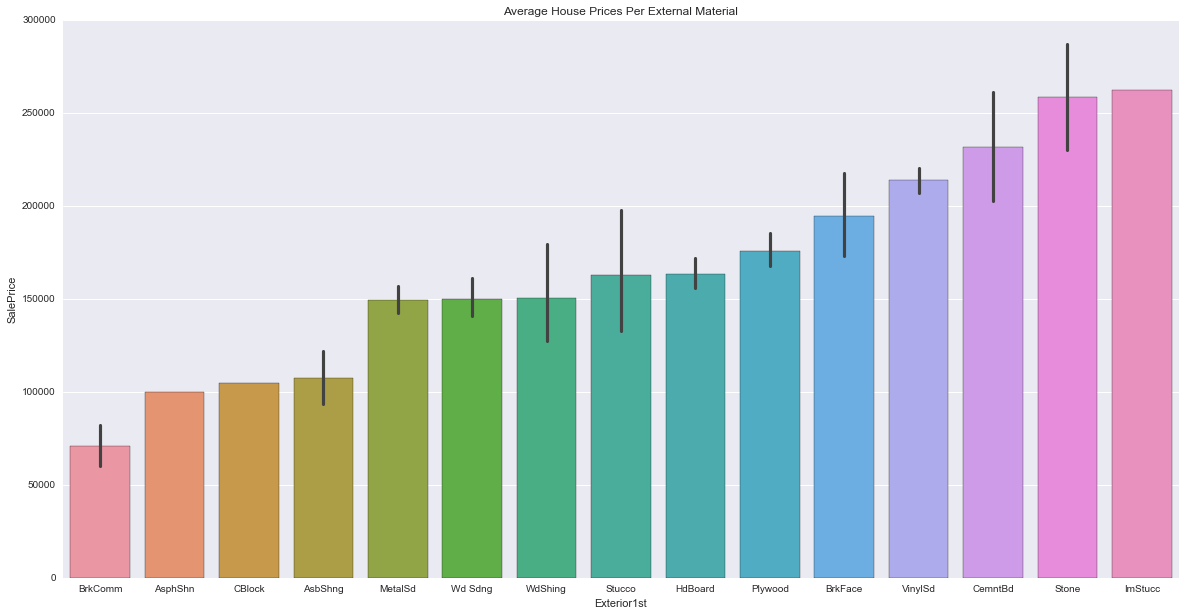

In [123]:
result = materials.groupby(["Exterior1st"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
plt.figure(figsize=(20,10))
plt.ylabel('Price ($)')
plt.xlabel('Type of Material')
plt.title('Average House Prices Per External Material')
sns.barplot(x='Exterior1st', y="SalePrice", data=materials, order=result['Exterior1st'])

So we see that the Brick Common material (covering the exterior of the house) has the lowest average, for housing price. 
Interestingly enough, the Imitation Stucco material actually has the highest average housing price (above real Stucco), 
followed by Stone, and then Cement Board. These are all more 'premium' consutruction materials typically found in luxury 
and more expensive homes (compared to wood and older bricks).

In [140]:
#Basement quality and timeline of prices

#Basement first
basement = (df.loc[:, ['BsmtFinType1', 'SalePrice']])

pivot2 = basement.groupby('BsmtFinType1').aggregate({
    'SalePrice': ['min', 'max', 'mean']
})
pivot2

SalePrice                       
                   min     max           mean
BsmtFinType1                                 
ALQ              81000  538000  161573.068182
BLQ              35311  359100  149493.655405
GLQ              80000  755000  235413.720096
LwQ              75500  301000  151852.702703
Rec              34900  381000  146889.248120
Unf              37900  582933  170670.576744

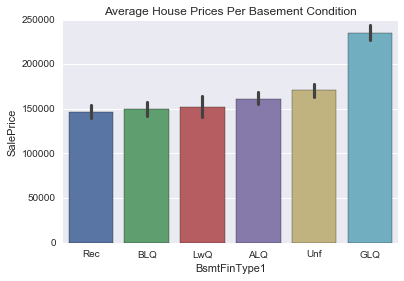

In [141]:
result = basement.groupby(["BsmtFinType1"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')

plt.ylabel('Price ($)')
plt.xlabel('Basement Condition')
plt.title('Average House Prices Per Basement Condition')
sns.barplot(x='BsmtFinType1', y="SalePrice", data=basement, order=result['BsmtFinType1'])


So we can see that unless the basement is at the level of GLQ - 'Good Living Quarters' (fully finished/highest standarad)
then it really does not have a high correlation with the price of the house; in the sense that there is not much delination between all of the other (less finished) basement conditions on the sold housing price. 

In [144]:
# Year
yearsold = (df.loc[:, ['YrSold', 'SalePrice']])
yearsold.head()

,YrSold,SalePrice
0,2008,208500
1,2007,181500
2,2008,223500
3,2006,140000
4,2008,250000


In [145]:
pivot3 = yearsold.groupby('YrSold').aggregate({
    'SalePrice': ['min', 'max', 'mean']
})
pivot3

SalePrice                       
             min     max           mean
YrSold                                 
2006       35311  625000  182549.458599
2007       39300  755000  186063.151976
2008       40000  446261  177360.838816
2009       34900  582933  179432.103550
2010       55000  611657  177393.674286

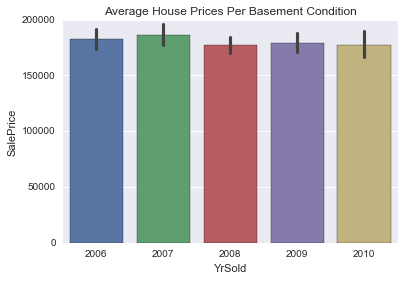

In [146]:
result = yearsold.groupby(["YrSold"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
plt.ylabel('Price ($)')
plt.xlabel('Basement Condition')
plt.title('Average House Prices Per Basement Condition')
sns.barplot(x='YrSold', y="SalePrice", data=yearsold)


So, unfortunately, for this particular dataset we cannot see a high correlation between the year of the transaction, and the sales price of the house (averages are about the same across 2006-2010).

Part of the reason is because this dataset does not provide a larger range of historical sales records (spanning more years). From a historical perspective, 2006-2009 represents the housing bubble recession experienced across the United States, lowering the value of properties. From research, housing prices only returned to the pre-recession value (and beyond) after 2012 in the United States. This means if the year sold column included data up to 2012 (or the present), then we would have seen a more interesting trend to analyze further.

### Cleaning dataset for ML models -

In [5]:
#First: Replacing NAs:

#LotFrontage, fill in NAs with mean
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

#BsmtFinType1, categorical basement feature, Na means there isn't a basement, so we can substitute with 'None'
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
  

In [6]:
#Check all NAs are gone
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinType1     0
BsmtFinSF1       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
TotalFullBath    0
TotalHalfBath    0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
PavedDrive       0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

### Converting categorical variables and misinterpreted features

MSSubClass: Labeled as numeric in the dataset, but this does not make sense, because the numeric codes identify the type of dwelling involved:

    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
    120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150  1-1/2 STORY PUD - ALL AGES
    160  2-STORY PUD - 1946 & NEWER
    180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190  2 FAMILY CONVERSION - ALL STYLES AND AGES
   
This does not mean that in our model, '20' is 6 times "worse" than '120' - they are simply different types of building styles
not labeled in any sequential order. These are codes, not values, which needs to be converted into categorical (strings) to avoid confusion, for further processing. 

The same logic applies to 'YrSold' because a house sold in 2006 does not mean it is 2000 times better than a house from 2000 years ago, etc., in scale.

In [7]:
#Converting categorical variables and misinterpreted features

#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Year
df['YrSold'] = df['YrSold'].astype(str)

#YearBuilt
df['YearBuilt'] = df['YearBuilt'].astype(str)

#YearRemodAdd
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)


Now, for categories which do follow a sequential order (which are relative, and can be approximated numerically)

Like for Heating Quality, which represents condition:

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   Po   Poor
For the purposes of this model and learning excersise, it is appropriate to just replace them as numeric (with poor the lowest, excellent the highest).

In [8]:
#Convert 'CentralAir' yes/no to 1/0
df['CentralAir'] = df['CentralAir'].replace("N", 0).replace("Y", 1)

#Labelencoder to scale as numeric (1 to n) for other categories 
from sklearn.preprocessing import LabelEncoder
cols = ('ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BldgType',
        'LotShape', 'PavedDrive', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'ExterQual')

# Process columns and apply LabelEncoder to transform 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Lotfrontage should be int, not float (data type retained because we filled in NAs previously) Convert:
df.LotFrontage = df.LotFrontage.astype(int)

#Check data types
df.dtypes

MSSubClass       object
MSZoning         object
LotFrontage       int32
LotArea           int64
LotShape          int64
Neighborhood     object
BldgType          int64
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
ExterQual         int64
ExterCond         int64
Foundation       object
BsmtFinType1      int64
BsmtFinSF1        int64
TotalBsmtSF       int64
Heating          object
HeatingQC         int64
CentralAir        int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
TotalFullBath     int64
TotalHalfBath     int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual       int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
PavedDrive        int64
YrSold            int64
SaleCondition    object
SalePrice         int64
dtype: object

So we have 8 columns remaining as object datatype (categorical variables).

Finally, applying one-hot encoding for these 8 columns which cannot be convered numerically (would not make sense)

In [40]:
#First creating 2 new dataframes, d1 as all the predictors we are keeping, d2 as the target (price)
#  i.e.  dropped the bathroom columns for basement/above ground because we already have the total count

d1 = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
         'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
         'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 
         'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'GrLivArea', 'TotalFullBath', 
         'TotalHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
         'Fireplaces', 'GarageCars', 'PavedDrive', 'YrSold', 'SaleCondition']]

d2 = df[['SalePrice']]

In [41]:
#SaleCondition - normal, bankrupt, family, etc. 
dummy_salecond = pd.get_dummies(d1["SaleCondition"],drop_first=True)

#MSZoning
dummy_zoning = pd.get_dummies(d1["MSZoning"],drop_first=True)

#Neighborhood
dummy_neighborhood = pd.get_dummies(d1["Neighborhood"],drop_first=True)

#HouseStyle
dummy_housestyle = pd.get_dummies(d1["HouseStyle"],drop_first=True)

#Exterior1st
dummy_exterior = pd.get_dummies(d1["Exterior1st"],drop_first=True)

#Foundation
dummy_foundation = pd.get_dummies(d1["Foundation"],drop_first=True)

#Heating
dummy_heating = pd.get_dummies(d1["Heating"],drop_first=True)

#MSSubClass
dummy_mssub = pd.get_dummies(d1["MSSubClass"],drop_first=True)


d1 = pd.concat([d1, dummy_salecond, dummy_zoning, dummy_neighborhood, dummy_housestyle, 
               dummy_exterior, dummy_foundation, dummy_heating, dummy_mssub],axis=1)

# Remove original columns after one-hot completed (no longer needed)? But first column already dropped.
d1.drop(["SaleCondition","MSZoning","Neighborhood", "HouseStyle", "Exterior1st", "Foundation", 
        "Heating", "MSSubClass"],axis=1,inplace=True)


# Dropping even more uncorrelated variables or avoid multicollinearity? Up to interpretation. None for now. 
d1.head()

,LotFrontage,LotArea,LotShape,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,30,40,45,50,60,70,75,80,85,90
0,65,8450,3,0,7,5,104,53,2,4,...,0,0,0,0,1,0,0,0,0,0
1,80,9600,3,0,6,8,77,26,3,4,...,0,0,0,0,0,0,0,0,0,0
2,68,11250,0,0,7,5,102,52,2,4,...,0,0,0,0,1,0,0,0,0,0
3,60,9550,0,0,7,5,19,20,3,4,...,0,0,0,0,0,1,0,0,0,0
4,84,14260,0,0,8,5,101,50,2,4,...,0,0,0,0,1,0,0,0,0,0


## ML Models, Boosting


In [42]:
#Making sure all inputs are integer datatype
d1 = d1.astype(int)
d2 = d2.astype(int)

#print(d1.dtypes)
#print(d2.dtypes)

In [43]:
# Partitioning the dataset, split into 80-20 percent for training-validiation 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=0.20)

In [44]:
#Normalizing - actually standardizing - the predictors
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [45]:
#Normalizing - fixing skew - for the target variable, price
y_train["SalePrice"] = np.log1p(y_train["SalePrice"])

y_test["SalePrice"] = np.log1p(y_test["SalePrice"])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
# helper function used to plot decision boundary (optional)
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [16]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### Adaboost

AdaBoost is a type of "Ensemble Learning" where multiple learners are employed to build a stronger learning algorithm. AdaBoost works by choosing a base algorithm and iteratively improving it by accounting for the incorrectly classified examples in the training set. 

We assign equal weights to all the training examples and choose a base algorithm. At each step of iteration, we apply the base algorithm to the training set and increase the weights of the incorrectly classified examples. We iterate n times, each time applying base learner on the training set with updated weights. The final model is the weighted sum of the n learners. 


In [111]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# With grid search - fine-tune Adaboost as base learners using grid search with cross-validation (GridSearchCV).
parameters = {
    "n_estimators": [20, 40, 60, 80, 100],
    "learning_rate": [0.01, 0.1, 1, 10]
}

#  Replace DecisionTree with other regression models? Linear regression 
#adaboost = AdaBoostRegressor(DecisionTreeClassifier(max_depth=4), random_state=0)
#adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
#adaboost_grid.fit(X_train, y_train)

# summarize the results of the grid search
#print("The best score is {}".format(adaboost_grid.best_score_))
#print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))
# returns error: ValueError: Unknown label type: 'continuous'

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = parameters,
 cv=3,
 n_iter = 8,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

print("The best score is {}".format(pre_gs_inst.best_score_))
print("The best hyper parameter setting is {}".format(pre_gs_inst.best_params_))

C:\Users\User\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best score is 0.8310639527
The best hyper parameter setting is {'n_estimators': 80, 'learning_rate': 1}


In [114]:
#plot_decision_boundary(pre_gs_inst, X_train, y_train)

#### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models.

Gradient boosting generates learners during the learning process. It build first learner to predict the values/labels of samples, and calculate the loss (the difference between the outcome of the first learner and the real value). It will build a second learner to predict the loss after the first step. The step continues to learn the third, forth… until certain threshold.

Adaboost requires users specify a set of weak learners (alternatively, it will randomly generate a set of weak learner before the real learning process). It will learn the weights of how to add these learners to be a strong learner. The weight of each learner is learned by whether it predicts a sample correctly or not. If a learner is mispredict a sample, the weight of the learner is reduced a bit. It will repeat such process until converge.

In [55]:
# Gradient Boosting
est = GradientBoostingRegressor(n_estimators= 1000, max_depth= 2, learning_rate= .01)
est.fit(X_train,y_train)

y_train_predict = est.predict(X_train)
y_test_predict = est.predict(X_test)
est_train = mean_squared_error(y_train, y_train_predict)
print("model Root Mean Squared Error on Train data: {}".format(np.sqrt(est_train)))


est_test = mean_squared_error(y_test, y_test_predict)
print('Root Mean square error on the Test set is: {}'.format(np.sqrt(est_test)))

C:\Users\User\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model Root Mean Squared Error on Train data: 0.104162080034
Root Mean square error on the Test set is: 0.133653398815


In [96]:
#Gradient boosting with cross validation grid search
parameters = {
    "n_estimators": [20, 40, 60, 80, 100],
    "learning_rate": [0.01, 0.1, 1, 10]
}

pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(),
 param_distributions = parameters,
 cv=3,
 n_iter = 8,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

print("The best score is {}".format(pre_gs_inst.best_score_))
print("The best hyper parameter setting is {}".format(pre_gs_inst.best_params_))

C:\Users\User\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best score is 0.885416822191
The best hyper parameter setting is {'n_estimators': 60, 'learning_rate': 0.1}


#### XGBoost

XGBoost is short for eXtreme gradient boosting. It is a library designed and optimized for boosted tree algorithms.

It's main goal is to push the extreme of the computation limits of machines to provide a scalable, portable and accurate for large scale tree boosting.

The model uses: 
        
        - Gradient Boosting algorithm also called gradient boosting machine including the learning rate.
        - Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
        - Regularized Gradient Boosting with both L1 and L2 regularization.

In [77]:
#XGBoost, fitting the model
#model = xgb.XGBRegressor()

model = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                        learning_rate=0.05, max_depth=6, 
                        min_child_weight=1.5, n_estimators=7200,
                        reg_alpha=0.9, reg_lambda=0.6,
                        subsample=0.2,seed=42, silent=1,
                        random_state =7)

model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1.5, missing=None,
       n_estimators=7200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=7, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=42, silent=1, subsample=0.2)


In [78]:
from sklearn.metrics import explained_variance_score
#Explained variance regression score function, Best possible score is 1.0, lower values are worse. A metric for accuracy. 
#Accruacy score cannot be used for continous value predictions, only for discrete classes which is why we use R2 or Varience

#XGBoost, predictions
y_pred = model.predict(X_test)

print(explained_variance_score(y_pred,y_test))

est_train = mean_squared_error(y_pred,y_test)
print("model Root Mean Squared Error on Test data: {}".format(np.sqrt(est_train)))

0.8841739221278183
model Root Mean Squared Error on Test data: 0.131741342373


In [98]:
#  XGBoost model with k-fold cross validation (in place of the manual split)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                        learning_rate=0.05, max_depth=6, 
                        min_child_weight=1.5, n_estimators=7200,
                        reg_alpha=0.9, reg_lambda=0.6,
                        subsample=0.2,seed=42, silent=1,
                        random_state =7)

#kfold = KFold(n_splits=10, random_state=7)
#results = cross_val_score(model, d1, d2, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#d1.shape[0]
#d2.shape[0]

#test_df = d1.loc[:,~d1.columns.duplicated()]
#duplicate_columns = test_df.columns[test_df.columns.duplicated()]
#duplicate_columns



#parameters = {
#    "n_estimators": [20, 40, 60, 80, 100],
#    "learning_rate": [0.01, 0.1, 1, 10]
#}

#pre_gs_inst = RandomizedSearchCV(model,
# param_distributions = parameters,
# cv=10,
# n_iter = 8,
# n_jobs=-1)

#pre_gs_inst.fit(X_train, y_train)

#print("The best score is {}".format(pre_gs_inst.best_score_))
#print("The best hyper parameter setting is {}".format(pre_gs_inst.best_params_))

#### LightGBM


LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast. 

It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.

LightGBM is a great implementation that is similar to XGBoost but varies in a few specific ways, especially in how it creates the trees. It offers some different parameters but most of them are very similar to their XGBoost counterparts. If you use the same parameters, you almost always get a very close score. In most cases, the training will be 2-10 times faster though

In [101]:
# Another type of gradient boosting, LightGBM
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                          learning_rate=0.05, n_estimators=720,
                          max_bin = 55, bagging_fraction = 0.8,
                          bagging_freq = 5, feature_fraction = 0.2319,
                          feature_fraction_seed=9, bagging_seed=9,
                          min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model.fit(X_train, y_train)
print(model)

C:\Users\User\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [102]:
#LGB, predictions
y_pred = model.predict(X_test)

print(explained_variance_score(y_pred,y_test))

est_train = mean_squared_error(y_pred,y_test)
print("model Root Mean Squared Error on Test data: {}".format(np.sqrt(est_train)))

0.8919662825015208
model Root Mean Squared Error on Test data: 0.127047780143


#### Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

In [104]:
# Lasso model
model = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

model.fit(X_train, y_train)
print(model)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])


In [105]:
#Lasso, predictions
y_pred = model.predict(X_test)

print(explained_variance_score(y_pred,y_test))

est_train = mean_squared_error(y_pred,y_test)
print("model Root Mean Squared Error on Test data: {}".format(np.sqrt(est_train)))

0.8857639290263858
model Root Mean Squared Error on Test data: 0.129297963254


#### Elastic Net Regularlization Model

The elastic net technique solves the regularization problem. For an α strictly between 0 and 1, and a nonnegative λ, elastic net solves the problem. Elastic net is the same as lasso when α = 1. As α shrinks toward 0, elastic net approaches ridge regression. For other values of α, the penalty term Pα(β) interpolates between the L1 norm of β and the squared L2 norm of β.

Elastic net regularization method includes both LASSO (L1) and Ridge (L2) regularization methods.

Overfitting : The core idea behind machine learning algorithms is to build models that can find the generalised trends within the data. However, if no measures are taken, sometimes the models tend to rote learn the data instead of learning the patterns. During such cases, although the model fits well to the training data ( model yields accurate results when evaluated on training data), however, it evaluated poorly on the test data. This is called overfit.

Regularization is used to prevent overfitting the model to training data. This is achieved by slightly perturbing ( adding noise ) the objective function of the model before optimizing it ( optimising a model means to find the model parameters w* such that the argmin /argmax of the objective function is found- in other words, it is to find the global optima of the objective function) . In L1 Regularisation, a noise of magnitude lambda .|w*| is added while in L2 Regularisation, noise of magnitude lambda.|w*|. |w*| is added. where |w*| is the magnitude of the optimal parameter vector.

In Elastic Net Regularization, a linear sum of both noises are added.

In [106]:
#Elastic Net
model = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

model.fit(X_train, y_train)
print(model)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])


In [107]:
#Elastic predictions
y_pred = model.predict(X_test)

print(explained_variance_score(y_pred,y_test))

est_train = mean_squared_error(y_pred,y_test)
print("model Root Mean Squared Error on Test data: {}".format(np.sqrt(est_train)))

0.8856971754175424
model Root Mean Squared Error on Test data: 0.129386247672


#### Kernel ridge regression (KRR): 

Combines Ridge Regression - R2 - with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. 

Ridge regression: Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.

Kernal trick: The kernel trick avoids the explicit mapping that is needed to get linear learning algorithms to learn a nonlinear function or decision boundary. For all and in the input space, certain functions can be expressed as an inner product in another space. The function is often referred to as a kernel or a kernel function.

In [115]:
#KRR
model = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

model.fit(X_train, y_train)
print(model)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)


In [116]:
#KRR predictions
y_pred = model.predict(X_test)

print(explained_variance_score(y_pred,y_test))

est_train = mean_squared_error(y_pred,y_test)
print("model Root Mean Squared Error on Test data: {}".format(np.sqrt(est_train)))

0.8889420243932209
model Root Mean Squared Error on Test data: 0.129534778846


###### End

In [119]:
#plot_decision_boundary(model, X_train, y_train)

In [ ]:
#train = pd.DataFrame[:ntrain]
#test = all_data[ntrain:]

# Setting up Cross-validation with k-folds, set seed = 1
#n_folds = 5

#def rmse_cv(model):
#    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
#    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#    return(rmse)

In [ ]:
#score = rmse_cv(model)
#print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))